In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform

pd.options.display.float_format = '{:.2f}'.format

In [2]:
from pathlib import Path
import tensorflow as tf

## IMPORT & EXPLORE

#### ABOUT THE DATA

The Iraq-Oncology Teaching Hospital/National Center for Cancer Diseases (IQ-OTH/NCCD) lung cancer dataset was collected in the above-mentioned specialist hospitals over a period of three months in fall 2019. It includes CT scans of patients diagnosed with lung cancer in different stages, as well as healthy subjects. IQ-OTH/NCCD slides were marked by oncologists and radiologists in these two centers. The dataset contains a total of 1190 images representing CT scan slices of 110 cases. These cases are grouped into three classes: normal, benign, and malignant. of these, 40 cases are diagnosed as malignant; 15 cases diagnosed with benign; and 55 cases classified as normal cases. The CT scans were originally collected in DICOM format. The scanner used is SOMATOM from Siemens. CT protocol includes: 120 kV, slice thickness of 1 mm, with window width ranging from 350 to 1200 HU and window center from 50 to 600 were used for reading. with breath hold at full inspiration. All images were de-identified before performing analysis. Written consent was waived by the oversight review board. The study was approved by the institutional review board of participating medical centers. Each scan contains several slices. The number of these slices range from 80 to 200 slices, each of them represents an image of the human chest with different sides and angles. The 110 cases vary in gender, age, educational attainment, area of residence and living status. Some of them are employees of the Iraqi ministries of Transport and Oil, others are farmers and gainers. Most of them come from places in the middle region of Iraq, particularly, the provinces of Baghdad, Wasit, Diyala, Salahuddin, and Babylon.

Note:
This dataset was created using the original dataset collected from Mendeley Data Publication, and various data augmentation techniques were applied to solve the class imbalance problem.

*Citation: alyasriy, hamdalla; AL-Huseiny, Muayed (2021), “The IQ-OTHNCCD lung cancer dataset”, Mendeley Data, V2, doi: 10.17632/bhmdr45bh2.2*


Kaggle link : https://www.kaggle.com/datasets/subhajeetdas/iq-othnccd-lung-cancer-dataset-augmented


And for the second source :

https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images/data



My thanks to the authors!.


#### FUNCTIONS

In [3]:
def directory_files( directory,
                     item_type = None):

    directory_files = sorted([ str(path) for path in directory.glob(f'*.{item_type}') ])

    return directory_files

In [4]:
def labeling( files ):

    file_labels = [ 0 if 'Normal' in path else (1 if 'Benign' in path else 2) for path in files ]

    return file_labels


In [5]:
def load_scans(image_paths, target_size=(224, 224)):
    loaded_images = []
    for path in image_paths:
        try:
            # Read and decode the image as grayscale (force 1 channel)
            image = tf.io.read_file(path)
            image = tf.image.decode_image(image, channels=1)  # Force grayscale format

            # Resize the image to the target size
            image = tf.image.resize(image, target_size)

            # Normalize pixel values to [0, 1]
            image = image / 255.0

            # Explicitly set the shape to (224, 224, 1) for consistency
            image.set_shape((target_size[0], target_size[1], 1))

            loaded_images.append(image)
        except Exception as e:
            print(f"Error loading image at {path}: {e}")

    return loaded_images

In [6]:
def display_examples(images, labels, num_examples=5):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_examples):
        ax = plt.subplot(1, num_examples, i + 1)
        ax.imshow(images[i])  # Display the image
        ax.set_title(f"Label: {labels[i]}")  # Display the label
        ax.axis("off")  # Hide axes
    
    plt.show()

#### IMAGES DIRECTORY

In [7]:
lung_benign_cases_directory = Path(r"C:\Users\User\Desktop\lung_tumor_project\ct_scans\Augmented IQ-OTHNCCD lung cancer dataset\Benign cases")

lung_malignant_cases_directory = Path(r"C:\Users\User\Desktop\lung_tumor_project\ct_scans\Augmented IQ-OTHNCCD lung cancer dataset\Malignant cases")

lung_normal_cases_directory = Path(r"C:\Users\User\Desktop\lung_tumor_project\ct_scans\Augmented IQ-OTHNCCD lung cancer dataset\Normal cases")


In [8]:
lung_benign_cases_directory_files = directory_files( directory = lung_benign_cases_directory ,
                                                      item_type = 'jpg')



lung_malignant_cases_directory_files_jpg = directory_files( directory = lung_malignant_cases_directory ,
                                                            item_type = 'jpg')

lung_malignant_cases_directory_files_png = directory_files( directory = lung_malignant_cases_directory ,
                                                            item_type = 'png')



lung_normal_cases_directory_files_jpg = directory_files( directory = lung_normal_cases_directory ,
                                                         item_type = 'jpg')

lung_normal_cases_directory_files_png = directory_files( directory = lung_normal_cases_directory ,
                                                         item_type = 'png')

In [9]:
lung_scan_cases_directory_files = ( (lung_malignant_cases_directory_files_jpg + lung_malignant_cases_directory_files_png) + lung_benign_cases_directory_files ) + (lung_normal_cases_directory_files_jpg +lung_normal_cases_directory_files_png )

In [10]:
len(lung_scan_cases_directory_files)

4159

#### LABELING

In [11]:
# First , let's 'shuffle' file paths 

lung_scan_cases_directory_files = pd.Series(lung_scan_cases_directory_files).sample(frac = 1,
                                                                                    replace = False, # no duplicates
                                                                                    random_state = 42) 

lung_scan_cases_directory_files = list(lung_scan_cases_directory_files)
                                                                                        

In [12]:
lung_scan_cases_directory_file_labels = labeling( lung_scan_cases_directory_files )

#### CONVERTING

In [13]:
lung_scan_cases = np.array(load_scans(image_paths = lung_scan_cases_directory_files))

lung_scan_cases_labels = np.array(lung_scan_cases_directory_file_labels)


#### DISPLAY

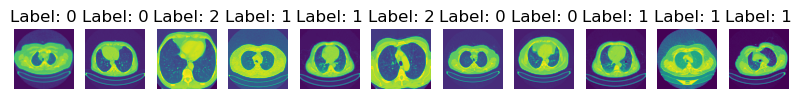

In [14]:
display_examples( images = lung_scan_cases ,
                  labels = lung_scan_cases_labels ,
                  num_examples = 11)

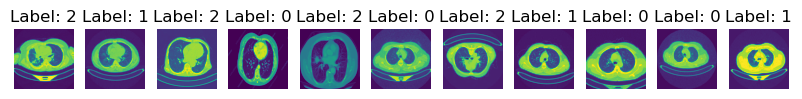

In [15]:
display_examples( images = lung_scan_cases[11:] ,
                  labels = lung_scan_cases_labels[11:] ,
                  num_examples = 11)

As we can see , scan arrays and labels matching and can be used to train model , let's save them

#### SAVE

In [16]:
np.savez_compressed(
    'lung_tumor_scan_cases.npz',

    scan_array = lung_scan_cases,
    labels = lung_scan_cases_labels
)

In [17]:
#### TEST LOADING

lung_scan_cases = np.load(r"C:\Users\User\Desktop\lung_tumor_project\ct_scans\scan_arrays\lung_tumor_scan_cases.npz")['scan_array']

lung_scan_cases_labels = np.load(r"C:\Users\User\Desktop\lung_tumor_project\ct_scans\scan_arrays\lung_tumor_scan_cases.npz")['labels']


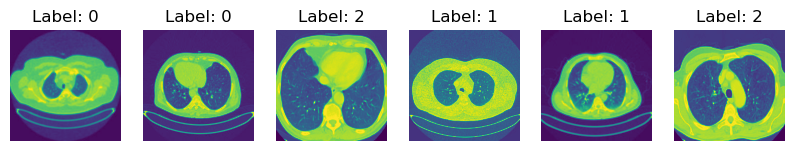

In [18]:
display_examples( images = lung_scan_cases ,
                  labels = lung_scan_cases_labels ,
                  num_examples = 6)

And now , we can see that arrays was properly saved and images are not 'broken'.